In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import itertools
from matplotlib.colors import Normalize, LogNorm, LinearSegmentedColormap

sys.path.append("..")

In [2]:
from manage_data import (get_conditions, load_result, delete_all, delete_result,
                         get_drag_by_velocity, get_std_by_velocity, get_log_scale)
from plot import get_colormap

In [3]:
# delete_all()

In [4]:
particle = 1000
ensemble = 1000

df = load_result(conditions=get_conditions(
    N_particle = particle,
    N_ensemble = ensemble,
    velocity = None,
    slope = None,
    Lambda = None,
    boundary = 10.0,
    N_bins = None,
    gamma = 1.0,
    temperature = 1.0,
    tau = 1.0,
    Da = 1.0,
    delta_t = 0.001,
    initial = None,
    sampling = None,
    )
)

df

,key,N_particle,N_ensemble,velocity,Lambda,boundary,N_bins,gamma,slope,temperature,tau,Da,delta_t,initial,sampling,interval,drag,std,time
4277,464411,1000,1000,0.001000,1.0,10.0,40,1.0,0.4,1.0,1.0,1.0,0.001,10000,10000,4.0,-9.059,183.553587,5727.984625
3582,1f4c6e,1000,1000,0.001000,1.0,10.0,40,1.0,0.6,1.0,1.0,1.0,0.001,10000,10000,4.0,44.091,178.682451,5626.133151
7914,a44241,1000,1000,0.001000,1.0,10.0,40,1.0,0.8,1.0,1.0,1.0,0.001,10000,10000,4.0,-145.791,184.254153,5615.131034
2561,cdd063,1000,1000,0.001259,1.0,10.0,40,1.0,0.4,1.0,1.0,1.0,0.001,10000,10000,4.0,-77.692,181.018939,5733.515333
7127,f3a7c5,1000,1000,0.001259,1.0,10.0,40,1.0,0.6,1.0,1.0,1.0,0.001,10000,10000,4.0,188.858,185.423540,5584.633908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,38b43b,1000,1000,7.943000,1.0,10.0,40,1.0,0.6,1.0,1.0,1.0,0.001,10000,10000,4.0,47876.867,72.789154,5583.083711
10582,9c71f1,1000,1000,7.943000,1.0,10.0,40,1.0,0.8,1.0,1.0,1.0,0.001,10000,10000,4.0,63845.355,72.303973,2027.584641
3098,1b4caa,1000,1000,10.000000,1.0,10.0,40,1.0,0.4,1.0,1.0,1.0,0.001,10000,10000,4.0,28226.280,60.892113,5623.527971
9448,9e7579,1000,1000,10.000000,1.0,10.0,40,1.0,0.6,1.0,1.0,1.0,0.001,10000,10000,4.0,42283.268,61.242857,5631.066495


In [27]:
# delete = df[df["size"] == 128]
delete = df
print(list(delete["key"]))
print(len(list(delete["key"])))
# delete_result(list(delete["key"]))

['464411', '1f4c6e', 'a44241', 'cdd063', 'f3a7c5', '5a39ab', '83112d', 'fcf98d', '5e7e74', 'ce4aaa', '4667b9', '474bc5', '465083', 'bd1a49', '0c0e8c', '357ce0', '65b54e', '6bf567', '7f1764', '8a9bd3', 'e78cfb', '6b5cf4', 'b4b9bb', '300a25', '84f1d1', '1bc97a', '5a1237', '77d70e', '75beb1', '5e0a17', 'f794ba', 'c6cdb8', 'fb2b51', 'a344cb', '2c111f', '83f276', '58a892', '09dd54', '51f0f3', 'd9b07b', 'e3c7f2', '8834bb', 'e3ee6f', '41409e', '14547f', '766f85', 'ff445e', '7dee59', '2635d5', 'dbce47', 'ce5daf', '72ca35', '44c4c4', 'ae8bcf', '5155f9', '8bb7db', 'afc596', '19b952', '9739eb', '8ad638', 'd07413', 'eea7c7', 'aee515', 'dabee2', 'e62e6c', '593e4d', '9642da', '20bd1e', '4ebfee', '859f65', 'da3b50', '47c5f3', '066df9', 'd6b2ed', '1e320a', 'ec51ed', '5ea2e7', '55bfd0', '69df48', '259930', '24db62', '05d6a1', '4f21e4', '433668', '1124e1', 'e2dfb1', '9383e7', 'c621dd', 'eea192', 'e20bb5', '2e1fba', 'a64d3c', '3146ec', 'e6a192', '7db915', '7cc495', '6f961f', 'f17e1b', 'd843bb', 'ba050e',

In [6]:
available_slope, available_Lambda, available_velocity = sorted(
    set(df["slope"].to_numpy())), sorted(set(df["Lambda"].to_numpy())), sorted(set(df["velocity"].to_numpy()))
print(f"data = {len(available_slope)} x {len(available_Lambda)} x {len(available_velocity)} = {len(available_slope)*len(available_Lambda)*len(available_velocity)}")
print(f"slope = {available_slope}")
print(f"Lambda = {available_Lambda}")
print(f"velocity = {available_velocity}")

data = 3 x 1 x 41 = 123
slope = [0.4, 0.6, 0.8]
Lambda = [1.0]
velocity = [0.001, 0.001259, 0.001585, 0.001995, 0.002512, 0.003162, 0.003981, 0.005012, 0.00631, 0.007943, 0.01, 0.01259, 0.01585, 0.01995, 0.02512, 0.03162, 0.03981, 0.05012, 0.0631, 0.07943, 0.1, 0.1259, 0.1585, 0.1995, 0.2512, 0.3162, 0.3981, 0.5012, 0.631, 0.7943, 1.0, 1.259, 1.585, 1.995, 2.512, 3.162, 3.981, 5.012, 6.31, 7.943, 10.0]


(41, 1, 3)


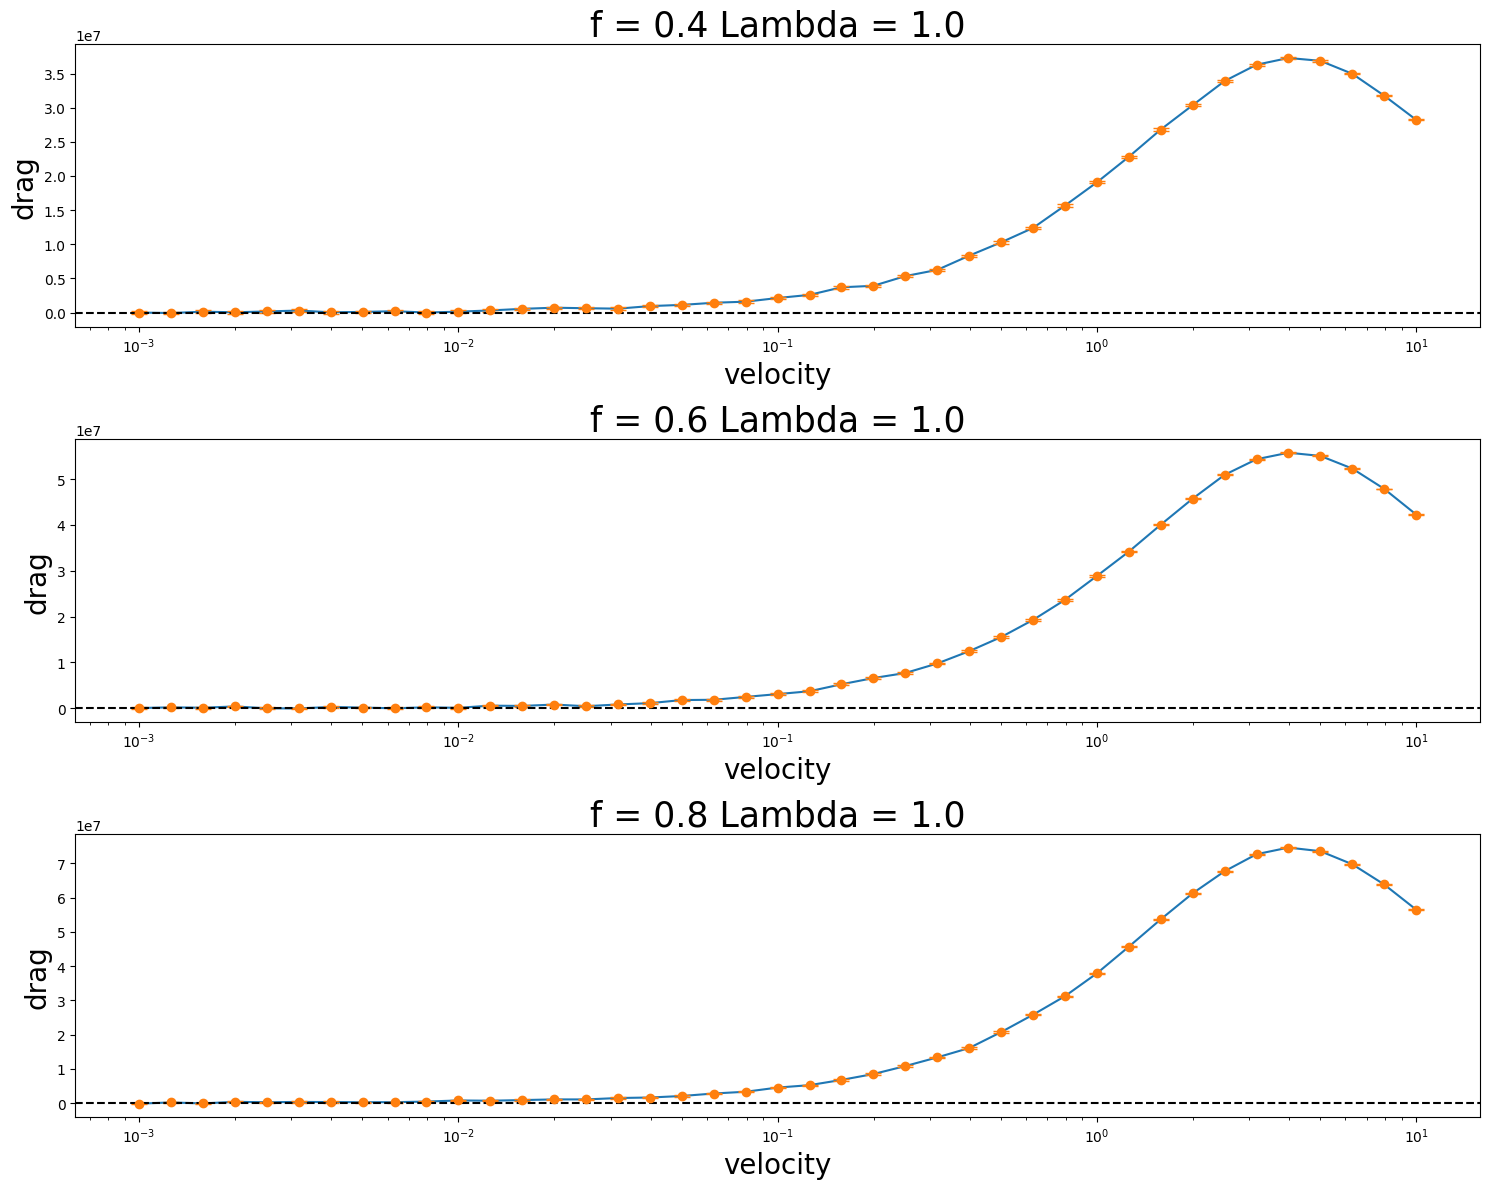

In [26]:
drag, std = [], []

for velocity in available_velocity:
    drag.append(get_drag_by_velocity(df, velocity=velocity))
    std.append(get_std_by_velocity(df, velocity=velocity))

drag, std = np.array(drag), np.array(std)
print(drag.shape)

fig, axs = plt.subplots(3, 1, figsize=(15,12))

for i in range(3):
    ax = axs[i]
    ax.set_title(f"f = {available_slope[i]} Lambda = {available_Lambda[0]}", fontsize=25)
    ax.set_xlabel("velocity", fontsize=20)
    ax.set_ylabel("drag", fontsize=20)
    ax.plot(available_velocity, drag[:,0,i])
    ax.errorbar(available_velocity, drag[:,0,i], std[:,0,i], fmt='o', linewidth=2, capsize=6)
    ax.axhline(0, linestyle="--", color="black")
    ax.set_xscale("log")
    # ax.set_xlim([0, 0.01])
    # ax.set_ylim([None, 1e6])

fig.tight_layout()
# plt.savefig(f"fig/drag ptcl={particle} ensemble={ensemble} variable={len(available_Lambda)*len(available_slope)}.jpg")
plt.show()

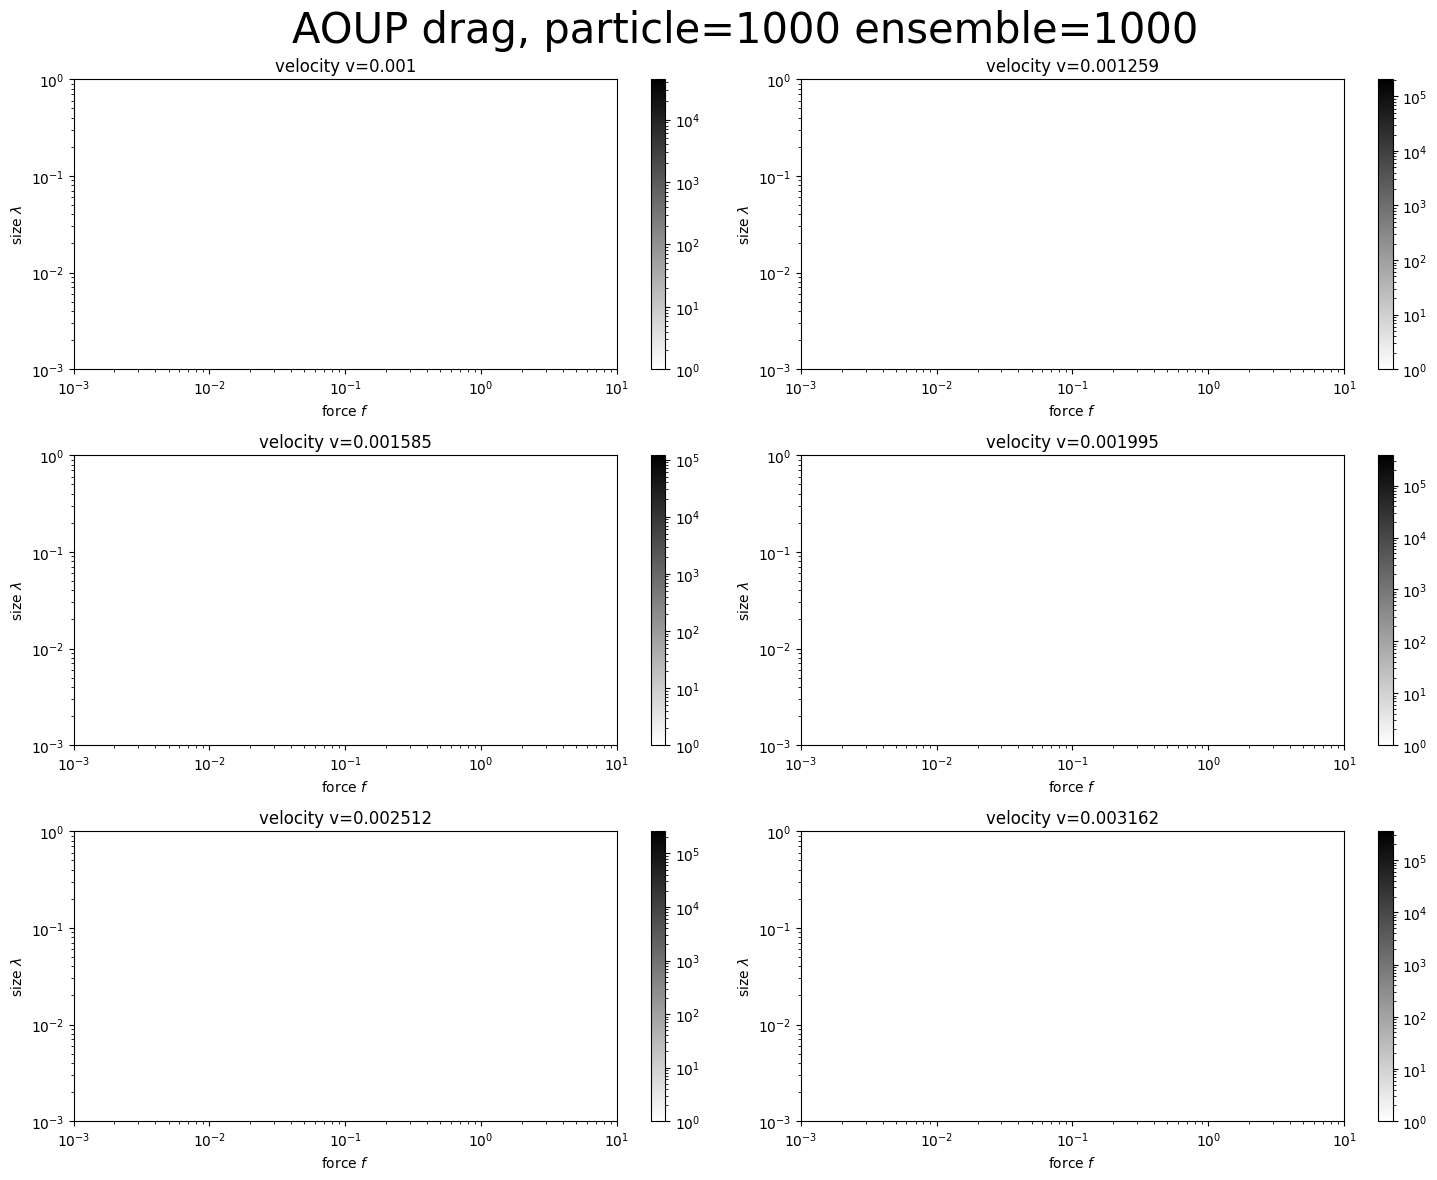

In [8]:
fig, axs = plt.subplots(3, 3, figsize=(15,12))
fig.suptitle(f"AOUP drag, particle={particle} ensemble={ensemble}", size=30)

for i, ax in enumerate(axs.flat):
    velocity = available_velocity[i]
    
    drag = get_drag_by_velocity(df, velocity=velocity)
    # print(np.log10(drag.max()), np.log10(-drag.min()))

    c = ax.pcolormesh(available_slope, available_Lambda, drag, shading="auto", 
                    norm=LogNorm(vmin=1, vmax=drag.max()), cmap="binary")
    # c = ax.pcolor(x, y, average, shading="auto",
    #                norm=Normalize(vmin=average.min(), vmax=0.0), cmap="bone")

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim([1.e-3, 1.e1])
    ax.set_ylim([1.e-3, 1])

    ax.set_title(f"velocity v={velocity}")
    ax.set_xlabel(rf"force $f$")
    ax.set_ylabel(rf"size $\lambda$")

    cbar = plt.colorbar(c)

fig.tight_layout()
# plt.savefig(f"./fig/AOUP drag, particle={particle} ensemble={ensemble}")
plt.show()

TypeError: Input z must be at least a (2, 2) shaped array, but has shape (1, 3)

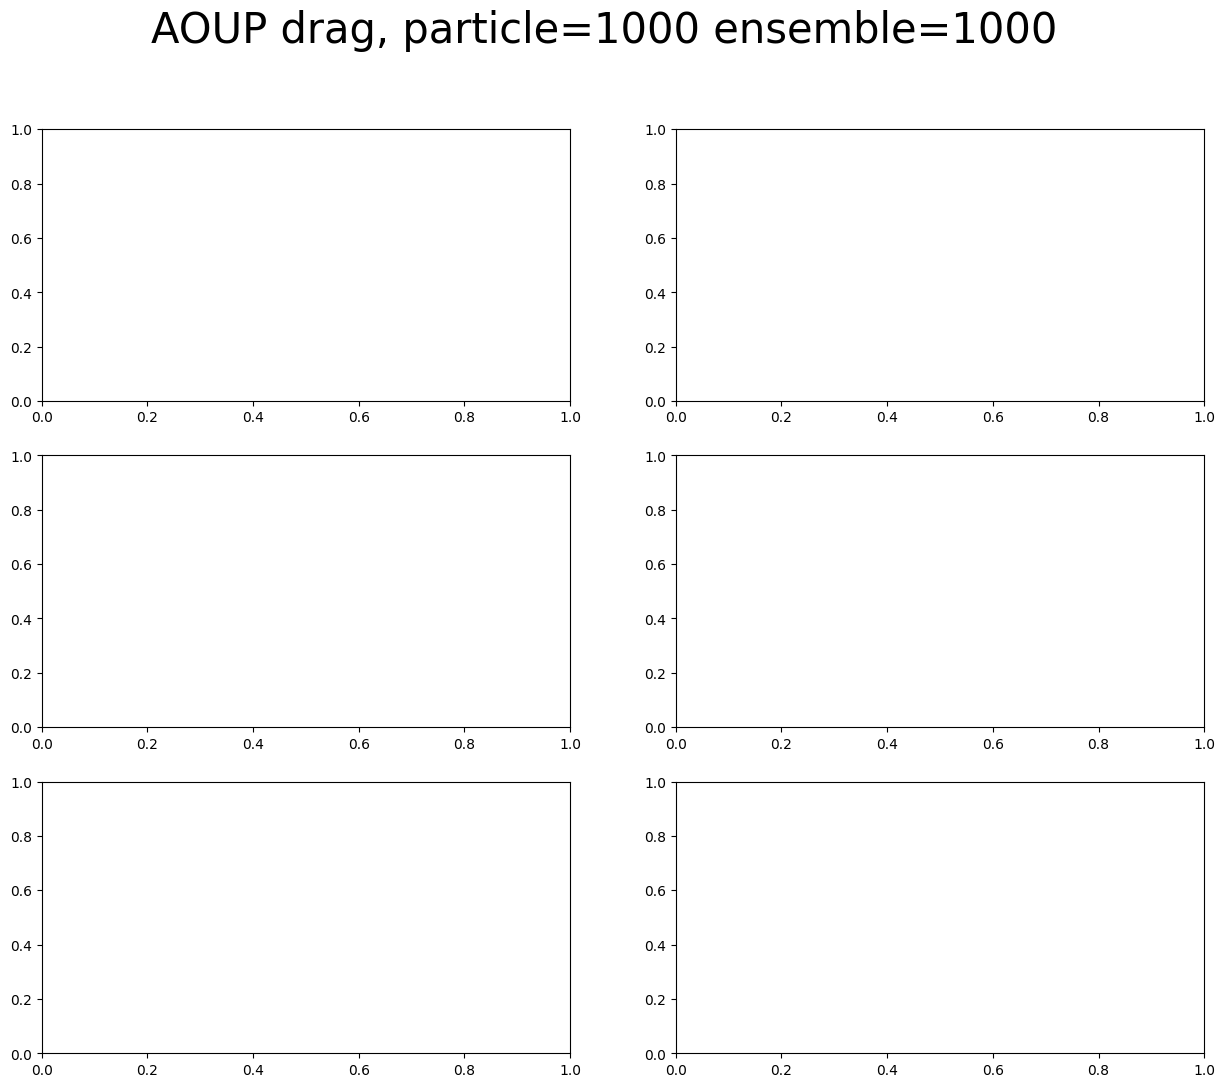

In [9]:
fig, axs = plt.subplots(3, 3, figsize=(15,12))
fig.suptitle(f"AOUP drag, particle={particle} ensemble={ensemble}", size=30)

for i, ax in enumerate(axs.flat):
    velocity = available_velocity[i]

    data = get_log_scale(df, velocity=velocity)

    cvals  = [data.min(), 0, data.max()]
    colors = ["red","white","blue"]
    cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="linear")

    c = ax.contourf(available_slope, available_Lambda, data, cmap=cmap, norm=norm)
    # c = ax.pcolormesh(available_slope, available_Lambda, data, cmap=cmap, norm=norm)

    ax.set_title(f"velocity v={velocity}")
    ax.set_xlabel(rf"force $f$")
    ax.set_ylabel(rf"size $\lambda$")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim([1.e-3, 1.e1])
    ax.set_ylim([1.e-3, 1])

    cbar = plt.colorbar(c)

fig.tight_layout()
# plt.savefig(f"./fig/AOUP drag, particle={particle} ensemble={ensemble}.jpg")
plt.show()

/tmp/ipykernel_1698518/1680568527.py:12: RuntimeWarning: invalid value encountered in divide
  Z = drag / std


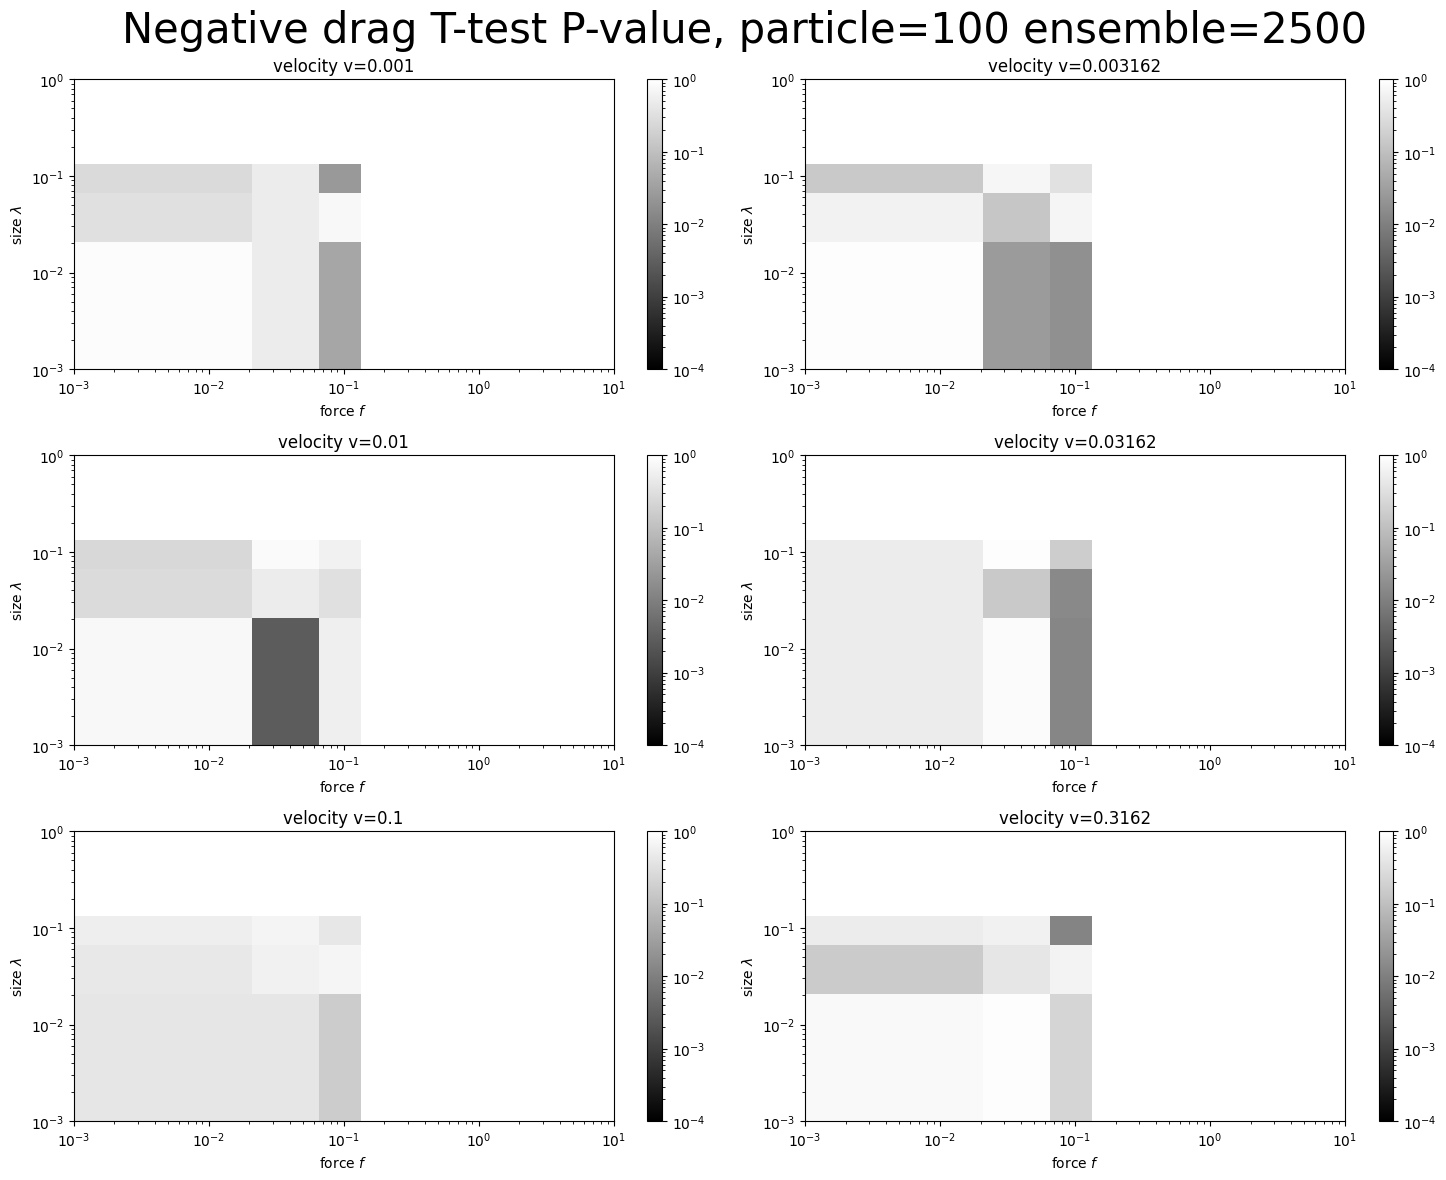

In [ ]:
import scipy.stats

fig, axs = plt.subplots(3, 3, figsize=(15,12))
fig.suptitle(f"Negative drag T-test P-value, particle={particle} ensemble={ensemble}", size=30)

for i, ax in enumerate(axs.flat):
    velocity=available_velocity[i]

    drag = get_drag_by_velocity(df, velocity=velocity)
    std = get_std_by_velocity(df, velocity=velocity)

    Z = drag / std
    Z[np.isnan(Z)] = 0.0
    p_value = scipy.stats.norm.cdf(Z)
    # print(p_value.min())
    
    cvals  = [1.e-4, 1.e0]
    colors = ["black","white"]
    cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="log")

    c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
                      cmap=cmap, norm=norm)

    ax.set_title(f"velocity v={velocity}")
    ax.set_xlabel(rf"force $f$")
    ax.set_ylabel(rf"size $\lambda$")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim([1.e-3, 1.e+1])
    ax.set_ylim([1.e-3, 1])

    cbar = plt.colorbar(c)

fig.tight_layout()
# plt.savefig(f"./fig/Negative drag T-Test P-value, particle={particle} ensemble={ensemble}.jpg")
plt.show()

In [ ]:
# from scipy.stats import norm

# fig, axs = plt.subplots(3, 3, figsize=(15,12))
# fig.suptitle(f"Positive drag T-test P-value, ensemble={ensemble}", size=30)

# for i, ax in enumerate(axs.flat):
#     velocity=available_velocity[i]

#     drag = get_drag_by_velocity(df, velocity=velocity)
#     std = get_std_by_velocity(df, velocity=velocity)

#     Z = drag / std
#     Z[np.isnan(Z)] = 0.0

#     p_value = 1 - norm.cdf(Z)
#     # p_value[np.isnan(p_value)] = 1.e-10
#     # print(p_value)
#     # print(p_value.min())

#     # c = ax.contourf(available_slope, available_Lambda, p_value,
#     #             norm=LogNorm(vmin=p_value.min(), vmax=1), cmap="binary_r")
#     c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
#                 norm=LogNorm(vmin=1.e-15, vmax=1.e-2), cmap="binary_r")

#     ax.set_title(f"velocity v={velocity}")
#     ax.set_xlabel(rf"force $f$")
#     ax.set_ylabel(rf"size $\lambda$")
#     ax.set_xscale("log")
#     ax.set_yscale("log")
#     ax.set_xlim([1.e-3, 1.e+1])
#     ax.set_ylim([1.e-3, 1])

#     cbar = plt.colorbar(c)

# fig.tight_layout()
# plt.savefig(f"./fig/Positive Drag T-Test P-value, ensemble={ensemble}.jpg")
# plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# import matplotlib.colors

# X = np.linspace(0, 10, 100)
# Y = np.linspace(0, 10, 100)
# X, Y = np.meshgrid(X, Y)

# rng = np.random.default_rng()
# energy = 2 * rng.random([100,100,10]) - 1

# fig = plt.figure(figsize=(10,20))
# # ax = fig.add_subplot(projection='3d')
# ax = plt.axes([0, -1, 1, 2],projection='3d')
# norm = matplotlib.colors.Normalize(vmin=np.min(energy),vmax=np.max(energy))

# for n, z in enumerate(list(np.linspace(0,10,10))):
#     Z = np.zeros_like(X)+z
#     ax.plot_surface(X, Y, Z, facecolors = cm.coolwarm(norm(energy[:,:,n])));

# ax.set_box_aspect((1, 1, 4))

# plt.show()

8.762938771419433 5.767803483975766


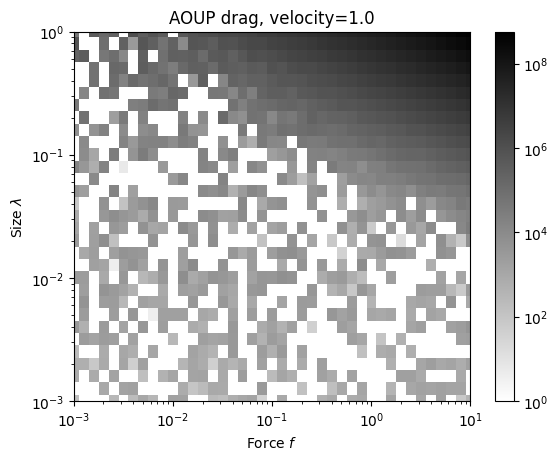

In [ ]:
fig, ax = plt.subplots()
velocity = 1.0

drag = get_drag_by_velocity(df, velocity=velocity)
print(np.log10(drag.max()), np.log10(-drag.min()))

cvals  = [1, drag.max()]
colors = ["white", "black"]
cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="log")

c = ax.pcolormesh(available_slope, available_Lambda, drag, shading="auto", 
                  norm=norm, cmap=cmap)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([1.e-3, 1.e+1])
ax.set_ylim([1.e-3, 1])

ax.set_title(f"AOUP drag, velocity={velocity}")
ax.set_xlabel(rf"Force $f$")
ax.set_ylabel(rf"Size $\lambda$")

cbar = plt.colorbar(c)
plt.show()

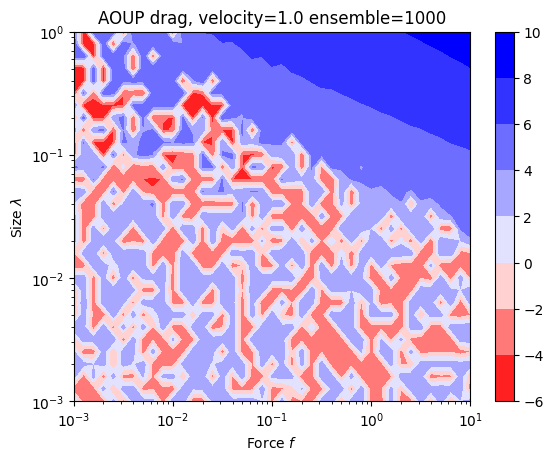

In [ ]:
fig, ax = plt.subplots()

data = get_log_scale(df, velocity=velocity)

cvals  = [data.min(), 0, data.max()]
colors = ["red","white","blue"]
cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="linear")

c = ax.contourf(available_slope, available_Lambda, data, cmap=cmap, norm=norm)
# c = ax.pcolormesh(available_slope, available_Lambda, data, cmap=cmap, norm=norm)

ax.set_title(f"AOUP drag, velocity={velocity} ensemble={ensemble}")
ax.set_xlabel(rf"Force $f$")
ax.set_ylabel(rf"Size $\lambda$")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([1.e-3, 1.e1])
ax.set_ylim([1.e-3, 1])

cbar = plt.colorbar(c)
# plt.savefig(f"./fig/AOUP drag, velocity={velocity}, ensemble={ensemble}.jpg")
plt.show()

0.004502841329233225


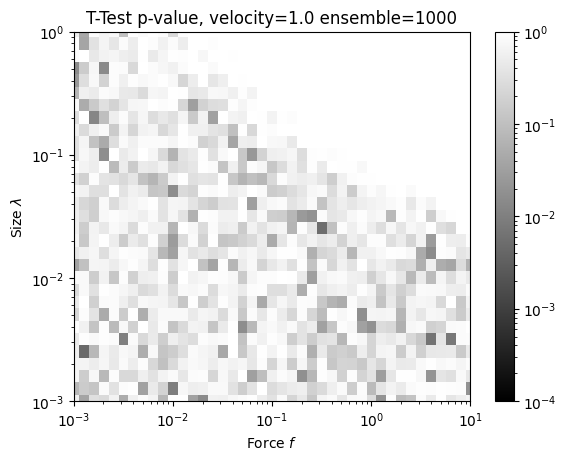

In [ ]:
drag = get_drag_by_velocity(df, velocity=velocity)
std = get_std_by_velocity(df, velocity=velocity)

Z = drag / std
Z[np.isnan(Z)] = 0.0

p_value = scipy.stats.norm.cdf(Z)
# print(p_value)
print(p_value.min())

fig, ax = plt.subplots()

cvals = [1.e-4, 1]
colors = ["black", "white"]
cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="log")

# c = ax.contourf(available_slope, available_Lambda, p_value, shading='auto',
#                norm=norm, cmap=cmap)
c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
               norm=norm, cmap=cmap)

ax.set_title(f"T-Test p-value, velocity={velocity} ensemble={ensemble}")
ax.set_xlabel(rf"Force $f$")
ax.set_ylabel(rf"Size $\lambda$")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([1.e-3, 1.e+1])
ax.set_ylim([1.e-3, 1])

cbar = plt.colorbar(c)
# plt.savefig(f"./fig/T-Test p-value, velocity={velocity}, ensemble={ensemble}.jpg")
plt.show()